In [1]:
import numpy as np
import pandas as pd

In [ ]:
numeric_train = pd.read_csv('train_numeric.csv')

In [2]:
date_train = pd.read_csv("train_date.csv")

Index(['Id', 'L0_S0_D1', 'L0_S0_D3', 'L0_S0_D5', 'L0_S0_D7', 'L0_S0_D9',
       'L0_S0_D11', 'L0_S0_D13', 'L0_S0_D15', 'L0_S0_D17',
       ...
       'L3_S50_D4246', 'L3_S50_D4248', 'L3_S50_D4250', 'L3_S50_D4252',
       'L3_S50_D4254', 'L3_S51_D4255', 'L3_S51_D4257', 'L3_S51_D4259',
       'L3_S51_D4261', 'L3_S51_D4263'],
      dtype='object', length=1157)

In [ ]:
categorical_train = pd.read_csv('train_categorical.csv')

In [62]:
failed_trial = numeric_train[numeric_train['Response'] == 1]

In [63]:
failed_trial.reset_index(inplace = True)

In [85]:
failed_trial.drop('index' , 1 , inplace = True)

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_5360/1641532957.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  failed_trial.drop('index' , 1 , inplace = True)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
failed_trial.shape

(6879, 971)

In [65]:
failed_trial.isnull().sum()

index              0
Id                 0
L0_S0_F0        3271
L0_S0_F2        3271
L0_S0_F4        3271
                ... 
L3_S51_F4256    6577
L3_S51_F4258    6577
L3_S51_F4260    6577
L3_S51_F4262    6577
Response           0
Length: 971, dtype: int64

In [66]:
duplicated_rows = []
products = {}

count = 1 

for i in range(failed_trial.shape[0]):
    product_name = 'Product'+ str(count)
    if i not in duplicated_rows:
        if product_name not in products:
            products[product_name] = []
            for k in range(i , failed_trial.shape[0]):
                if k not in duplicated_rows:
                    if failed_trial.iloc[i].isnull().equals(failed_trial.iloc[k].isnull()):
                        products[product_name].append(k)
                        duplicated_rows.append(k)
        count +=1
    if i%10 == 0:
        print(i)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740
750
760
770
780
790
800
810
820
830
840
850
860
870
880
890
900
910
920
930
940
950
960
970
980
990
1000
1010
1020
1030
1040
1050
1060
1070
1080
1090
1100
1110
1120
1130
1140
1150
1160
1170
1180
1190
1200
1210
1220
1230
1240
1250
1260
1270
1280
1290
1300
1310
1320
1330
1340
1350
1360
1370
1380
1390
1400
1410
1420
1430
1440
1450
1460
1470
1480
1490
1500
1510
1520
1530
1540
1550
1560
1570
1580
1590
1600
1610
1620
1630
1640
1650
1660
1670
1680
1690
1700
1710
1720
1730
1740
1750
1760
1770
1780
1790
1800
1810
1820
1830
1840
1850
1860
1870
1880
1890
1900
1910
1920
1930
1940
1950
1960
1970
1980
1990
2000
2010
2020
2030
2040
2050
2060
2070
2080
2090
2100
2110
2120
2130
2140
2150
2160
2170
2180
2190
2200
2210
2

In [67]:
products['Product32']

[35,
 130,
 203,
 366,
 419,
 425,
 426,
 519,
 547,
 559,
 560,
 653,
 660,
 736,
 740,
 802,
 842,
 915,
 929,
 930,
 1057,
 1239,
 1267,
 1282,
 1363,
 1449,
 1654,
 1682,
 1783,
 1806,
 1909,
 1941,
 2269,
 2537,
 2636,
 2675,
 2813,
 2821,
 3009,
 3098,
 3165,
 3238,
 3296,
 3395,
 3442,
 3551,
 3573,
 3576,
 3594,
 3604,
 3649,
 3805,
 3864,
 3966,
 4072,
 4092,
 4390,
 4514,
 4522,
 4525,
 4579,
 4721,
 4945,
 5023,
 5024,
 5128,
 5260,
 5436,
 5585,
 5611,
 5679,
 5890,
 5891,
 5937,
 5961,
 6073,
 6409,
 6525,
 6579,
 6591,
 6592,
 6679,
 6729,
 6730,
 6805,
 6833]

In [68]:
len(products.keys())

1795

In [69]:
temp = products['Product2']
print(len(temp))

2


In [70]:
dict_len = {}

for i in products.keys():
    temp = products[i]
    dict_len[i] = len(temp)

dict_len


{'Product1': 14,
 'Product2': 2,
 'Product3': 4,
 'Product4': 20,
 'Product5': 1,
 'Product6': 13,
 'Product7': 3,
 'Product8': 9,
 'Product9': 1,
 'Product10': 33,
 'Product11': 6,
 'Product12': 56,
 'Product13': 24,
 'Product14': 79,
 'Product15': 3,
 'Product16': 1,
 'Product17': 2,
 'Product18': 25,
 'Product19': 24,
 'Product20': 5,
 'Product21': 4,
 'Product22': 15,
 'Product23': 1,
 'Product24': 1,
 'Product25': 17,
 'Product26': 36,
 'Product27': 14,
 'Product28': 74,
 'Product29': 33,
 'Product30': 4,
 'Product31': 20,
 'Product32': 86,
 'Product33': 7,
 'Product34': 11,
 'Product35': 19,
 'Product36': 3,
 'Product37': 7,
 'Product38': 5,
 'Product39': 1,
 'Product40': 32,
 'Product41': 4,
 'Product42': 23,
 'Product43': 8,
 'Product44': 35,
 'Product45': 6,
 'Product46': 4,
 'Product47': 6,
 'Product48': 1,
 'Product49': 35,
 'Product50': 23,
 'Product51': 21,
 'Product52': 74,
 'Product53': 3,
 'Product54': 36,
 'Product55': 23,
 'Product56': 26,
 'Product57': 28,
 'Product5

In [71]:
dict_len = pd.DataFrame(
    [{"product_name": name, "length": length} for name, length in dict_len.items()])
dict_len.head()

,product_name,length
0,Product1,14
1,Product2,2
2,Product3,4
3,Product4,20
4,Product5,1


In [72]:
dict_len.length.sum()

6879

In [73]:
dict_len.length.mean()

3.8323119777158774

In [74]:
# sort the dataframe based on length 

dict_len = dict_len.sort_values(by=['length']).tail(200)
dict_len.tail(10)

,product_name,length
119,Product120,40
133,Product134,40
11,Product12,56
147,Product148,70
89,Product90,71
51,Product52,74
27,Product28,74
103,Product104,77
13,Product14,79
31,Product32,86


In [75]:
dict_len.length.mean()

18.755

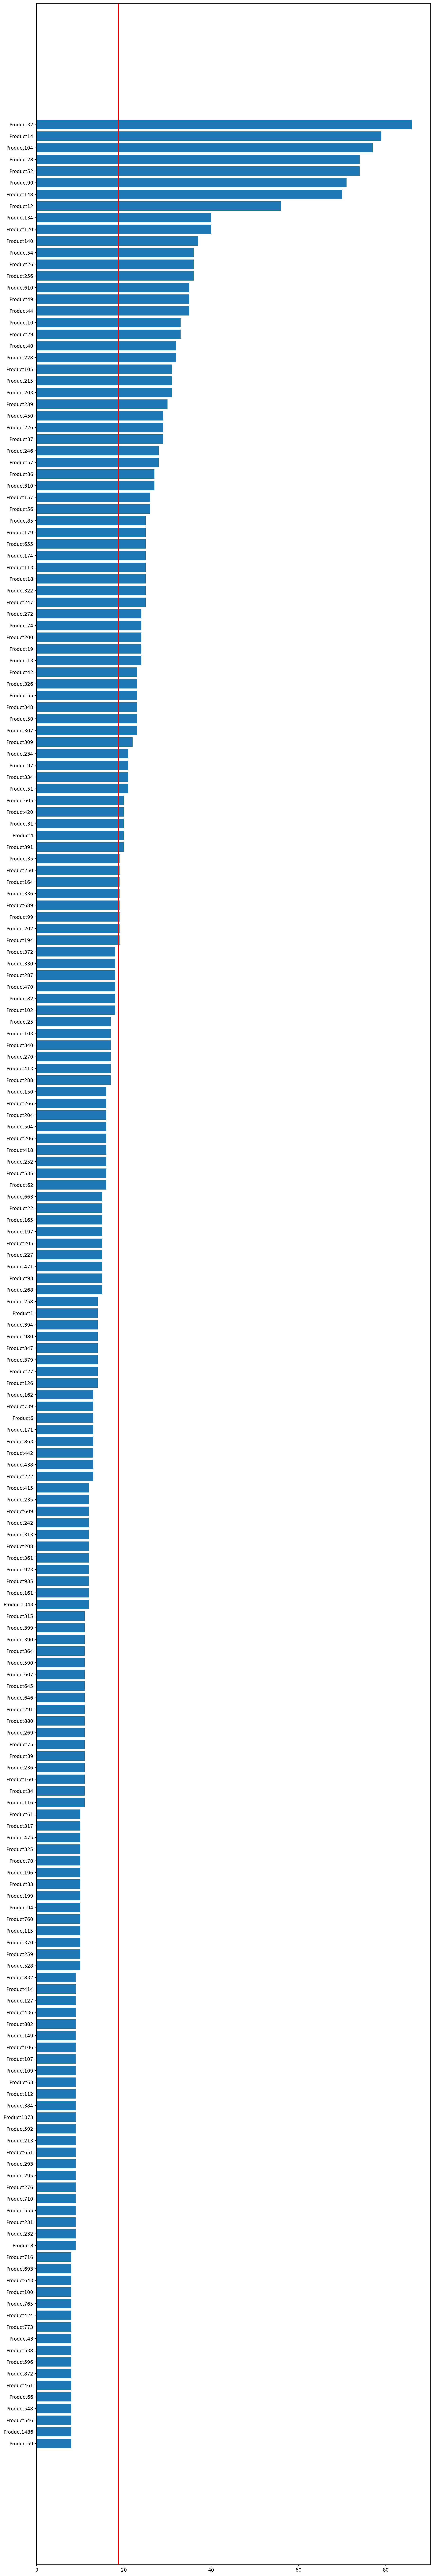

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,100) , dpi = 200)
plt.barh(dict_len['product_name'] , dict_len['length'])
plt.axvline(x = dict_len.length.mean() , color = 'r', label = 'axvline - full height')

### mean is 18 so lets round it to 15 and use only those datframes which have length greater than 15

In [77]:
dict_len_2 = dict_len[dict_len.length > 15]
dict_len_2.shape

(92, 2)

In [78]:
for i in products.keys():
    for j in products[i]:
        failed_trial.loc[j , 'product_name'] = i

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [79]:
failed_trial.shape

(6879, 972)

In [80]:
failed_trial.isnull().sum()

index              0
Id                 0
L0_S0_F0        3271
L0_S0_F2        3271
L0_S0_F4        3271
                ... 
L3_S51_F4258    6577
L3_S51_F4260    6577
L3_S51_F4262    6577
Response           0
product_name       0
Length: 972, dtype: int64

In [60]:
failed_trial.dropna(subset = ['product_name'], inplace=True)
failed_trial.shape

(6879, 971)

In [81]:
failed_trial

,index,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,...,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response,product_name
0,539,1053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product1
1,633,1250,0.075,0.101,-0.179,-0.216,-0.013,0.070,-0.022,-0.152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product2
2,681,1350,0.069,0.041,0.330,0.330,-0.100,-0.294,0.008,0.088,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product3
3,887,1793,0.003,-0.026,0.330,0.294,0.074,0.161,0.022,0.128,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product4
4,1152,2347,-0.114,-0.161,0.330,0.330,-0.013,0.116,0.045,0.288,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6874,1183037,2366099,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,-0.25,0.0,0.0,0.0,0.0,1,Product1795
6875,1183052,2366124,0.101,0.048,0.003,0.003,-0.100,-0.248,-0.015,-0.072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product54
6876,1183093,2366209,0.016,0.041,-0.179,-0.179,0.074,0.116,-0.015,-0.072,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product94
6877,1183242,2366505,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Product112


In [91]:
df_temp = failed_trial[failed_trial['product_name'] == 'Product32']
df_temp.dropna(subset = ['Id'], inplace=True)
for j in df_temp.columns:
    if df_temp[j].isnull().values.all() == True:
        df_temp.drop(j ,axis = 1 , inplace = True)
df_temp.head()

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Id,L1_S24_F1512,L1_S24_F1514,L1_S24_F1516,L1_S24_F1518,L1_S24_F1520,L1_S24_F1539,L1_S24_F1544,L1_S24_F1565,L1_S24_F1567,...,L3_S35_F3898,L3_S35_F3903,L3_S35_F3908,L3_S35_F3913,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response,product_name
35,11575,-0.039,0.120,-0.087,0.051,-0.050,-0.002,-0.003,0.003,0.171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Product32
130,44685,0.052,-0.081,-0.054,0.013,0.080,0.016,-0.005,-0.053,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Product32
203,73300,-0.052,-0.144,-0.092,0.037,0.110,-0.013,0.003,-0.056,0.100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Product32
366,135760,-0.052,-0.185,-0.031,0.000,0.133,-0.018,0.007,0.041,0.134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Product32
419,154815,0.000,-0.150,-0.038,0.064,-0.126,0.007,-0.007,0.043,0.076,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,Product32


In [92]:
dict_products_clean = {}
count =1

for i in dict_len_2['product_name']:
    df_temp = failed_trial[failed_trial['product_name'] == i]
    df_temp.dropna(subset = ['Id'], inplace=True)
    for j in df_temp.columns:
        if df_temp[j].isnull().values.all() == True:
            df_temp.drop(j ,axis = 1 , inplace = True)
    dict_products_clean['df_{}'.format(str(count))] = df_temp
    count +=1

C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [93]:
dict_products_clean.keys()

dict_keys(['df_1', 'df_2', 'df_3', 'df_4', 'df_5', 'df_6', 'df_7', 'df_8', 'df_9', 'df_10', 'df_11', 'df_12', 'df_13', 'df_14', 'df_15', 'df_16', 'df_17', 'df_18', 'df_19', 'df_20', 'df_21', 'df_22', 'df_23', 'df_24', 'df_25', 'df_26', 'df_27', 'df_28', 'df_29', 'df_30', 'df_31', 'df_32', 'df_33', 'df_34', 'df_35', 'df_36', 'df_37', 'df_38', 'df_39', 'df_40', 'df_41', 'df_42', 'df_43', 'df_44', 'df_45', 'df_46', 'df_47', 'df_48', 'df_49', 'df_50', 'df_51', 'df_52', 'df_53', 'df_54', 'df_55', 'df_56', 'df_57', 'df_58', 'df_59', 'df_60', 'df_61', 'df_62', 'df_63', 'df_64', 'df_65', 'df_66', 'df_67', 'df_68', 'df_69', 'df_70', 'df_71', 'df_72', 'df_73', 'df_74', 'df_75', 'df_76', 'df_77', 'df_78', 'df_79', 'df_80', 'df_81', 'df_82', 'df_83', 'df_84', 'df_85', 'df_86', 'df_87', 'df_88', 'df_89', 'df_90', 'df_91', 'df_92'])

In [94]:
dict_products_clean['df_92'].isnull().sum().sum()

0

In [ ]:
columns = {}
count = 1

for i in dict_products_clean.keys():
    df_temp = dict_products_clean[i]
    df_temp.drop('product_name' , 1 , inplace = True)
    column = df_temp.columns
    columns['column_{}'.format(str(count))] = column
    count +=1

In [ ]:
columns

In [ ]:
pd.DataFrame([columns] , )

columns_df = pd.DataFrame(
    [{"number": number, "columns": columns} for number, columns in columns.items()])

columns_df.head()

In [ ]:
columns_df['columns'][0]

In [ ]:
columns_df.to_csv(r'D:/bosch_production/columns_df.csv')

In [ ]:
df_1 = pd.read_csv("D:/bosch_production/train/train_numeric.csv" , usecols = columns['column_1'])
df_1.dropna(inplace = True)
df_1.shape

In [ ]:
# save the dataframes to local
dict_df = {}
for i in columns.keys():
    df = pd.read_csv("D:/bosch_production/train/train_numeric.csv" , usecols = columns[i])
    df.dropna(inplace = True)
    var = i.split('_')[1]
    dict_df['df_{}'.format(str(var))] = df
    df.to_csv(r'D:/bosch_production/dataframes/df_{}.csv'.format(str(var)))
    print('Done!{}'.format(var))

In [ ]:
dict_df['df_84'].head()

In [ ]:
# create a list containing id of each unit being differentiated in different dataframes
exclude_id = []

for i in dict_df.keys():
    df= dict_df[i]
    id_ = df['Id']
    for k in id_:
        exclude_id.append(k)

** **

** **

** **

In [ ]:
duplicated_rows = []
products = {}

count = 1 

for i in range(failed_trial.shape[0]):
    product_name = 'Product'+ str(count)
    if i not in duplicated_rows:
        if product_name not in products:
            products[product_name] = []
            for k in range(i , failed_trial.shape[0]):
                if k not in duplicated_rows:
                    if failed_trial.iloc[i].isnull().equals(failed_trial.iloc[k].isnull()):
                        products[product_name].append(k)
                        duplicated_rows.append(k)
        count +=1
    if i%10 == 0:
        print(i)

In [ ]:
dict_len = {}

for i in products.keys():
    temp = products[i]
    dict_len[i] = len(temp)

dict_len

In [ ]:
dict_len = dict_len.sort_values(by=['length']).tail(200)
dict_len.tail(10)

In [ ]:
dict_len_2 = dict_len[dict_len.length > 15]
dict_len_2.shape

In [ ]:
duplicated_rows = []
products_num = {}
for i in dict_len_2.keys():
    id_ = products[i][0]
    if product_name not in products_num:
        products_num[i] = []
        for k in range(numeric_train.index[numeric_train['Id'] == id_] - 1 , numeric_train.shape[0]):
            if k not in duplicated_rows:
                if numeric_train.iloc[numeric_train.index[numeric_train['Id'] == id_]].isnull().equals(numeric_train.iloc[k].isnull()):
                    products_num[i].append(k)
                    duplicated_rows.append(k)

In [ ]:
len(products_num.keys())

In [ ]:
for i in products_num.keys():
    for j in products_num[i]:
        numeric_train.loc[j , 'product_name'] = i

In [ ]:
dict_products_clean = {}
count =1

for i in products_num.keys():
    df_temp = numeric_train[numeric_train['product_name'] == i]
    df_temp.dropna(subset = ['Id'], inplace=True)
    for j in df_temp.columns:
        if df_temp[j].isnull().values.all() == True:
            df_temp.drop(j ,axis = 1 , inplace = True)
    dict_products_clean['df_{}'.format(str(count))] = df_temp
    count +=1

In [ ]:
dict_products_clean.keys()

In [ ]:
for i in dict_products_clean.keys():
    df = dict_products_clean[i]
    df.to_csv(r"//tsclient/D/bosch_production/date_dataframes/df_{}.csv".format(str(i.split('_')[1])) , index = False)

** **

** **

** **

In [3]:
count = 1
dict_df = {}
for i in range(92):
    df = pd.read_csv('//tsclient/D/bosch_production/dataframes/df_{}.csv'.format(str(count)), index_col=[0])
    dict_df['df_{}'.format(str(count))] = df
    count += 1

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
merge_date = {}

# its not possible to get all the time_stamps

for i in dict_df.keys():
    df = dict_df[i]
    nparr = df['Id'].to_numpy()
    date_df = date_train[date_train['Id'].isin(nparr)]
    merge_df = df.merge(date_df, on = 'Id')
    for j in merge_df.columns:
        if merge_df[j].isnull().values.any() == True:
            merge_df.drop(j , 1, inplace = True)
    merge_date['merge_date_{}'.format(str(i.split('_')[1]))] = merge_df
    print('Done!{}'.format(str(i.split('_')[1])))
    print(merge_df.shape , ':' , df.shape , '\n')

Done!1
(12852, 335) : (12852, 160) 

Done!2
(12379, 335) : (12379, 160) 

Done!3
(12830, 335) : (12830, 160) 

Done!4
(12676, 335) : (12676, 160) 

Done!5
(12920, 335) : (12920, 160) 

Done!6
(12252, 335) : (12252, 160) 

Done!7
(3455, 460) : (3455, 212) 

Done!8
(12228, 335) : (12228, 160) 

Done!9
(12365, 335) : (12365, 160) 

Done!10
(2653, 403) : (2653, 194) 

Done!11
(233, 433) : (233, 199) 

Done!12
(17750, 355) : (17750, 166) 

Done!13
(12388, 335) : (12388, 160) 

Done!14
(18360, 356) : (18360, 166) 

Done!15
(12416, 335) : (12416, 160) 

Done!16
(9476, 399) : (9476, 192) 

Done!17
(12589, 335) : (12589, 160) 

Done!18
(12618, 335) : (12618, 160) 

Done!19
(12428, 335) : (12428, 160) 

Done!20
(2470, 460) : (2470, 212) 

Done!21
(12792, 335) : (12792, 160) 

Done!22
(12677, 335) : (12677, 160) 

Done!23
(9277, 399) : (9277, 192) 

Done!24
(12406, 335) : (12406, 160) 

Done!25
(12487, 335) : (12487, 160) 

Done!26
(12396, 335) : (12396, 160) 

Done!27
(12814, 335) : (12814, 160)

In [6]:
import dask.dataframe as dd

In [9]:
for i in merge_date.keys():
    df = merge_date[i]
    df.to_csv(r"//tsclient/D/bosch_production/date_dataframes/merge_date_{}.csv".format(str(i.split('_')[2])) , index = False)

In [5]:
merge_date = {}

for i in range(1, 93):
    merge_df = pd.read_csv("//tsclient/D/bosch_production/date_dataframes/merge_date_{}.csv".format(i))
    merge_date['merge_date_{}'.format(i)] = merge_df


In [7]:
categorical_train = dd.read_csv('//tsclient/D/bosch_production/train/train_categorical.csv', dtype = 'category')

In [33]:
merge_date['merge_date_1']

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S36_D3940,L3_S37_D3942,L3_S37_D3943,L3_S37_D3945,L3_S37_D3947,L3_S37_D3949,L3_S37_D3951,L3_S38_D3953,L3_S38_D3957,L3_S38_D3961
0,365,-0.010,0.019,-0.015,0.003,0.031,0.116,0.000,-0.032,-0.031,...,889.53,889.53,889.53,889.53,889.53,889.53,889.53,NaN,NaN,NaN
1,409,-0.068,-0.108,0.003,-0.016,0.118,0.025,0.015,0.128,0.046,...,148.18,148.18,148.18,148.18,148.18,148.18,148.18,NaN,NaN,NaN
2,502,-0.049,-0.078,0.003,-0.016,0.074,0.161,0.015,0.088,-0.056,...,944.08,944.08,944.08,944.08,944.08,944.08,944.08,NaN,NaN,NaN
3,584,0.010,0.063,-0.015,-0.034,0.031,0.070,0.000,-0.072,0.173,...,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81,NaN,NaN,NaN
4,1036,0.095,0.071,-0.179,-0.179,0.031,0.161,-0.030,-0.112,0.071,...,946.40,946.40,946.40,946.40,946.40,946.40,946.40,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12847,2366705,-0.003,-0.056,-0.052,-0.034,0.161,-0.021,0.000,0.048,-0.230,...,274.31,274.31,274.31,274.31,274.31,274.31,274.31,NaN,NaN,NaN
12848,2366733,-0.003,0.019,-0.161,-0.197,-0.404,-0.566,-0.015,-0.072,-0.046,...,370.54,370.54,370.54,370.54,370.54,370.54,370.54,NaN,NaN,NaN
12849,2367072,0.095,0.078,-0.015,0.003,0.074,0.116,-0.015,-0.072,0.112,...,1449.06,1449.06,1449.06,1449.06,1449.06,1449.06,1449.06,NaN,NaN,NaN
12850,2367226,0.154,0.078,-0.015,-0.034,-0.056,0.116,-0.030,-0.072,0.000,...,1110.21,1110.21,1110.21,1110.21,1110.21,1110.21,1110.21,NaN,NaN,NaN


In [50]:
list(merge_date['merge_date_1'][:1].isnull().any().index.values)
len(list(merge_date['merge_date_1'][:1].isnull().any().index.values))

1001

In [ ]:
for i in merge_date.keys():
    categorical_df = categorical_train[usecols['cols_{}'.format(str(i.split('_')[2]))]].dropna()

In [ ]:
merge_whole.keys()

In [ ]:
merge_whole['merge_1']

In [36]:
merge_date['merge_date_1']['Id'][0]

365

In [39]:
min_list = []
for i in merge_date.keys():
    min_ = merge_date[i]['Id'][0]
    min_list.append(min_)
print(max(min_list))

16519


In [32]:
val = merge_date['merge_date_1']['Id'].to_numpy()
categorical_df = categorical_train[categorical_train['Id'].isin(val)]

categorical_df.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
181,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
206,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
301,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
530,1036,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
categorical_df = categorical_df[categorical_df.columns[~categorical_df.isnull().all()]]
categorical_df

,Id
181,365
206,409
257,502
301,584
530,1036
...,...
16032,32064
16149,32311
16158,32329
16174,32354


In [69]:
len(min_list)

92

In [12]:
categorical_train = pd.read_csv('train_categorical.csv')

In [ ]:
categorical_train.isnull().sum()

In [58]:
val = merge_date['merge_date_1']['Id'][0]
categorical_df = categorical_train[categorical_train['Id'] == val ]
categorical_df

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
181,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
categorical_df.isnull()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
181,False,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [63]:
categorical_df[categorical_df.columns[~categorical_df.isnull().any()]]

,Id,L2_S26_F3038,L2_S26_F3042,L2_S26_F3045,L2_S26_F3049,L2_S26_F3053,L2_S26_F3057,L2_S26_F3060,L2_S26_F3064,L2_S26_F3067,...,L3_S29_F3466,L3_S29_F3469,L3_S29_F3472,L3_S29_F3475,L3_S29_F3478,L3_S29_F3481,L3_S29_F3484,L3_S29_F3487,L3_S29_F3490,L3_S29_F3493
181,365,T1,T1,T1,T1,T1,T1,T1,T1,T1,...,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1


In [72]:
for i in merge_date.keys():
    val = merge_date[i]['Id'][0]
    categorical_df = categorical_train[categorical_train['Id'] == val ]
    categorical_df = categorical_df[categorical_df.columns[~categorical_df.isnull().any()]]
    print(len(categorical_df.columns))

91
64
64
64
64
1
60
64
64
64
125
123
64
123
64
1
64
64
64
60
64
64
64
1
64
64
64
64
123
64
64
64
91
123
64
64
64
64
28
1
91
64
62
1
64
28
91
123
91
64
64
64
1
123
64
64
64
64
91
64
1
64
64
64
64
1
64
64
64
1
1
1
91
28
91
1
64
64
64
64
64
1
64
64
123
60
60
123
123
123
123
123


In [13]:
categorical_train = pd.read_csv('train_categorical.csv' , nrows = 16519, low_memory=False)

In [36]:
val = merge_date['merge_date_1']['Id'][0]
categorical_df = categorical_train[categorical_train['Id'] == val ]
categorical_df = categorical_df[categorical_df.columns[~categorical_df.isnull().any()]]
print(categorical_df.shape[1])

categorical_train_ = pd.read_csv('//tsclient/D/bosch_production/train/train_categorical.csv' ,
                                    usecols = categorical_df.columns,
                                 dtype='category')

categorical_train_ = categorical_train_.dropna()
print(categorical_train_.shape , merge_date['merge_date_1'].shape)

91
(158804, 91) (12852, 335)


In [41]:
max_list = []
for i in merge_date.keys():
    max_ =  merge_date[i].iloc[-1, merge_date[i].columns.get_loc('Id')]
    max_list.append(max_)
print(max(max_list))

2367495


In [54]:
df1= pd.read_csv('//tsclient/D/bosch_production/train/train_categorical.csv', usecols = ['Id'])
df1.tail()

,Id
1183742,2367490
1183743,2367491
1183744,2367492
1183745,2367493
1183746,2367495


In [55]:
df = merge_date['merge_date_1']
nparr = df['Id'].to_numpy()

In [56]:
cat_df = df1[df1['Id'].isin(nparr)]
print(cat_df.shape)

(12852, 1)


In [47]:
min_index = df.index[df['Id'] == 16519][0]
print(min_index)

8325


In [48]:
index = df.index[df['Id'] == 2367495][0]
print(index)

1183746


In [3]:
categorical_train = pd.read_csv("C:/Users/hp/Downloads/train_categorical.csv/train_categorical.csv", dtype = 'category')

In [4]:
categorical_train.head()

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
count = 1
date_df = {}
for i in range(92):
    df = pd.read_csv("C:/Users/hp/Downloads/date_dataframes/merge_date_{}.csv".format(str(count)))
    date_df['date_df_{}'.format(str(count))] = df
    count += 1
print('Done!')

Done!


In [11]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [16]:
date_df['date_df_1'].head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S36_D3928,L3_S36_D3932,L3_S36_D3936,L3_S36_D3940,L3_S37_D3942,L3_S37_D3943,L3_S37_D3945,L3_S37_D3947,L3_S37_D3949,L3_S37_D3951
0,365,-0.010,0.019,-0.015,0.003,0.031,0.116,0.000,-0.032,-0.031,...,889.53,889.53,889.53,889.53,889.53,889.53,889.53,889.53,889.53,889.53
1,409,-0.068,-0.108,0.003,-0.016,0.118,0.025,0.015,0.128,0.046,...,148.18,148.18,148.18,148.18,148.18,148.18,148.18,148.18,148.18,148.18
2,502,-0.049,-0.078,0.003,-0.016,0.074,0.161,0.015,0.088,-0.056,...,944.08,944.08,944.08,944.08,944.08,944.08,944.08,944.08,944.08,944.08
3,584,0.010,0.063,-0.015,-0.034,0.031,0.070,0.000,-0.072,0.173,...,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81,1242.81
4,1036,0.095,0.071,-0.179,-0.179,0.031,0.161,-0.030,-0.112,0.071,...,946.40,946.40,946.40,946.40,946.40,946.40,946.40,946.40,946.40,946.40


In [26]:
categorical_train.shape

(1183747, 2141)

In [31]:
categorical_df = categorical_train[categorical_train['Id'] == '365']

In [32]:
categorical_df[categorical_df.columns[~categorical_df.isnull().any()]]

,Id,L2_S26_F3038,L2_S26_F3042,L2_S26_F3045,L2_S26_F3049,L2_S26_F3053,L2_S26_F3057,L2_S26_F3060,L2_S26_F3064,L2_S26_F3067,...,L3_S29_F3466,L3_S29_F3469,L3_S29_F3472,L3_S29_F3475,L3_S29_F3478,L3_S29_F3481,L3_S29_F3484,L3_S29_F3487,L3_S29_F3490,L3_S29_F3493
181,365,T1,T1,T1,T1,T1,T1,T1,T1,T1,...,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1


In [37]:
df = date_df['date_df_1']
nparr = df['Id'].to_numpy()
val = str(df['Id'][0])
print(val)
categorical_df = categorical_train[categorical_train['Id'] == val ]
categorical_df

365


,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
181,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
categorical = {}

# its not possible to get all the time_stamps

for i in date_df.keys():
    df = date_df[i]
    nparr = df['Id'].to_numpy(dtype = 'str')
    val = str(df['Id'][0])
    categorical_df = categorical_train[categorical_train['Id'] == val]
    categorical_df = categorical_df[categorical_df.columns[~categorical_df.isnull().any()]]
    cols = categorical_df.columns
    
    print(categorical_df.shape[1])
    
    categorical_train_ = categorical_train[cols]
    print(categorical_train_.shape)
    
    cat_df = categorical_train_[categorical_train_['Id'].isin(nparr)]
    print(cat_df.shape)
    
    categorical['cat_{}'.format(str(i.split('_')[2]))] = cat_df
    print('Done!{}'.format(str(i.split('_')[2])) , '\n')

91
(1183747, 91)
(12852, 91)
Done!1 

64
(1183747, 64)
(12379, 64)
Done!2 

64
(1183747, 64)
(12830, 64)
Done!3 

64
(1183747, 64)
(12676, 64)
Done!4 

64
(1183747, 64)
(12920, 64)
Done!5 

1
(1183747, 1)
(12252, 1)
Done!6 

60
(1183747, 60)
(3455, 60)
Done!7 

64
(1183747, 64)
(12228, 64)
Done!8 

64
(1183747, 64)
(12365, 64)
Done!9 

64
(1183747, 64)
(2653, 64)
Done!10 

125
(1183747, 125)
(233, 125)
Done!11 

123
(1183747, 123)
(17750, 123)
Done!12 

64
(1183747, 64)
(12388, 64)
Done!13 

123
(1183747, 123)
(18360, 123)
Done!14 

64
(1183747, 64)
(12416, 64)
Done!15 

1
(1183747, 1)
(9476, 1)
Done!16 

64
(1183747, 64)
(12589, 64)
Done!17 

64
(1183747, 64)
(12618, 64)
Done!18 

64
(1183747, 64)
(12428, 64)
Done!19 

60
(1183747, 60)
(2470, 60)
Done!20 

64
(1183747, 64)
(12792, 64)
Done!21 

64
(1183747, 64)
(12677, 64)
Done!22 

64
(1183747, 64)
(9277, 64)
Done!23 

1
(1183747, 1)
(12406, 1)
Done!24 

64
(1183747, 64)
(12487, 64)
Done!25 

64
(1183747, 64)
(12396, 64)
Done!26 

64

In [60]:
for i in categorical.keys():
    df = categorical[i]
    print(df.shape)

(12852, 91)
(12379, 64)
(12830, 64)
(12676, 64)
(12920, 64)
(12252, 1)
(3455, 60)
(12228, 64)
(12365, 64)
(2653, 64)
(233, 125)
(17750, 123)
(12388, 64)
(18360, 123)
(12416, 64)
(9476, 1)
(12589, 64)
(12618, 64)
(12428, 64)
(2470, 60)
(12792, 64)
(12677, 64)
(9277, 64)
(12406, 1)
(12487, 64)
(12396, 64)
(12814, 64)
(12131, 64)
(3178, 123)
(12608, 64)
(9425, 64)
(9420, 64)
(12466, 91)
(2297, 123)
(9389, 64)
(9128, 64)
(9637, 64)
(9575, 64)
(9087, 28)
(9597, 1)
(9660, 91)
(9290, 64)
(270, 62)
(12373, 1)
(9594, 64)
(9280, 28)
(9346, 91)
(2477, 123)
(12804, 91)
(12390, 64)
(9509, 64)
(9168, 64)
(9329, 1)
(3222, 123)
(9370, 64)
(9519, 64)
(9278, 64)
(9516, 64)
(9660, 91)
(9393, 64)
(12758, 1)
(9425, 64)
(9120, 64)
(9439, 64)
(9566, 64)
(9429, 1)
(9532, 64)
(9361, 64)
(9526, 64)
(9335, 1)
(9197, 1)
(9284, 1)
(9637, 91)
(9177, 28)
(9443, 91)
(9125, 1)
(9295, 64)
(9490, 64)
(9529, 64)
(9537, 64)
(9388, 64)
(9551, 1)
(9395, 64)
(9134, 64)
(9168, 123)
(9237, 60)
(9483, 60)
(9646, 123)
(12249, 12

In [61]:
for i in categorical.keys():
    df = categorical[i]
    df.to_csv(r"C:/Users/hp/Downloads/cat/cat_{}.csv".format(str(i.split('_')[1])) , index = False)

In [38]:
count = 1
categorical = {}
for i in range(92):
    df = pd.read_csv("C:/Users/hp/Downloads/cat/cat_{}.csv".format(str(count)))
    categorical['cat_{}'.format(str(count))] = df
    count += 1
print('Done!')

Done!


In [39]:
categorical['cat_1'].nunique()

Id              12852
L2_S26_F3038        1
L2_S26_F3042        1
L2_S26_F3045        1
L2_S26_F3049        1
                ...  
L3_S29_F3481        1
L3_S29_F3484        1
L3_S29_F3487        1
L3_S29_F3490        1
L3_S29_F3493        1
Length: 91, dtype: int64

In [40]:
pd.get_dummies(categorical['cat_1'])

,Id,L2_S26_F3038_T1,L2_S26_F3042_T1,L2_S26_F3045_T1,L2_S26_F3049_T1,L2_S26_F3053_T1,L2_S26_F3057_T1,L2_S26_F3060_T1,L2_S26_F3064_T1,L2_S26_F3067_T1,...,L3_S29_F3466_T1,L3_S29_F3469_T1,L3_S29_F3472_T1,L3_S29_F3475_T1,L3_S29_F3478_T1,L3_S29_F3481_T1,L3_S29_F3484_T1,L3_S29_F3487_T1,L3_S29_F3490_T1,L3_S29_F3493_T1
0,365,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,409,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,502,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,584,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1036,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12847,2366705,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12848,2366733,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
12849,2367072,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12850,2367226,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [41]:
one_hot = {}
for i in categorical.keys():
    df = categorical[i]
    df = pd.get_dummies(df)
    one_hot['one_hot_{}'.format(str(i.split('_')[1]))] = df

In [42]:
for i in one_hot.keys():
    df = one_hot[i]
    print(df.shape)

(12852, 92)
(12379, 64)
(12830, 64)
(12676, 64)
(12920, 64)
(12252, 1)
(3455, 68)
(12228, 64)
(12365, 64)
(2653, 64)
(233, 144)
(17750, 136)
(12388, 64)
(18360, 136)
(12416, 64)
(9476, 1)
(12589, 64)
(12618, 64)
(12428, 64)
(2470, 73)
(12792, 64)
(12677, 64)
(9277, 64)
(12406, 1)
(12487, 64)
(12396, 64)
(12814, 64)
(12131, 64)
(3178, 136)
(12608, 64)
(9425, 64)
(9420, 64)
(12466, 92)
(2297, 133)
(9389, 64)
(9128, 64)
(9637, 64)
(9575, 64)
(9087, 29)
(9597, 1)
(9660, 92)
(9290, 64)
(270, 83)
(12373, 1)
(9594, 64)
(9280, 29)
(9346, 92)
(2477, 133)
(12804, 92)
(12390, 64)
(9509, 64)
(9168, 64)
(9329, 1)
(3222, 133)
(9370, 64)
(9519, 64)
(9278, 64)
(9516, 64)
(9660, 92)
(9393, 64)
(12758, 1)
(9425, 64)
(9120, 64)
(9439, 64)
(9566, 64)
(9429, 1)
(9532, 64)
(9361, 64)
(9526, 64)
(9335, 1)
(9197, 1)
(9284, 1)
(9637, 92)
(9177, 29)
(9443, 92)
(9125, 1)
(9295, 64)
(9490, 64)
(9529, 64)
(9537, 64)
(9388, 64)
(9551, 1)
(9395, 64)
(9134, 64)
(9168, 136)
(9237, 73)
(9483, 73)
(9646, 136)
(12249, 13

In [43]:
for i in one_hot.keys():
    df = one_hot[i]
    df.to_csv(r"C:/Users/hp/Downloads/dummy/one_hot_{}.csv".format(str(i.split('_')[2])) , index = False)

In [44]:
one_hot['one_hot_1']

,Id,L2_S26_F3038_T1,L2_S26_F3042_T1,L2_S26_F3045_T1,L2_S26_F3049_T1,L2_S26_F3053_T1,L2_S26_F3057_T1,L2_S26_F3060_T1,L2_S26_F3064_T1,L2_S26_F3067_T1,...,L3_S29_F3466_T1,L3_S29_F3469_T1,L3_S29_F3472_T1,L3_S29_F3475_T1,L3_S29_F3478_T1,L3_S29_F3481_T1,L3_S29_F3484_T1,L3_S29_F3487_T1,L3_S29_F3490_T1,L3_S29_F3493_T1
0,365,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,409,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,502,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,584,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1036,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12847,2366705,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12848,2366733,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
12849,2367072,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12850,2367226,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [2]:
categorical_train = pd.read_csv("C:/Users/hp/Downloads/train_categorical.csv/train_categorical.csv", dtype = 'category')

In [49]:
count = 1
date_df = {}
for i in range(92):
    df = pd.read_csv("C:/Users/hp/Downloads/date_dataframes/merge_date_{}.csv".format(str(count)))
    date_df['date_df_{}'.format(str(count))] = df
    count += 1
print('Done!')

Done!


In [45]:
count = 1
cat_df = {}
for i in range(92):
    df = pd.read_csv("C:/Users/hp/Downloads/dummy/one_hot_{}.csv".format(str(count)))
    cat_df['cat_df_{}'.format(str(count))] = df
    count += 1
print('Done!')

Done!


In [21]:
date_df.keys()

dict_keys(['date_df_1', 'date_df_2', 'date_df_3', 'date_df_4', 'date_df_5', 'date_df_6', 'date_df_7', 'date_df_8', 'date_df_9', 'date_df_10', 'date_df_11', 'date_df_12', 'date_df_13', 'date_df_14', 'date_df_15', 'date_df_16', 'date_df_17', 'date_df_18', 'date_df_19', 'date_df_20', 'date_df_21', 'date_df_22', 'date_df_23', 'date_df_24', 'date_df_25', 'date_df_26', 'date_df_27', 'date_df_28', 'date_df_29', 'date_df_30', 'date_df_31', 'date_df_32', 'date_df_33', 'date_df_34', 'date_df_35', 'date_df_36', 'date_df_37', 'date_df_38', 'date_df_39', 'date_df_40', 'date_df_41', 'date_df_42', 'date_df_43', 'date_df_44', 'date_df_45', 'date_df_46', 'date_df_47', 'date_df_48', 'date_df_49', 'date_df_50', 'date_df_51', 'date_df_52', 'date_df_53', 'date_df_54', 'date_df_55', 'date_df_56', 'date_df_57', 'date_df_58', 'date_df_59', 'date_df_60', 'date_df_61', 'date_df_62', 'date_df_63', 'date_df_64', 'date_df_65', 'date_df_66', 'date_df_67', 'date_df_68', 'date_df_69', 'date_df_70', 'date_df_71', 'dat

In [52]:
cat_df.keys()

dict_keys(['cat_df_1', 'cat_df_2', 'cat_df_3', 'cat_df_4', 'cat_df_5', 'cat_df_6', 'cat_df_7', 'cat_df_8', 'cat_df_9', 'cat_df_10', 'cat_df_11', 'cat_df_12', 'cat_df_13', 'cat_df_14', 'cat_df_15', 'cat_df_16', 'cat_df_17', 'cat_df_18', 'cat_df_19', 'cat_df_20', 'cat_df_21', 'cat_df_22', 'cat_df_23', 'cat_df_24', 'cat_df_25', 'cat_df_26', 'cat_df_27', 'cat_df_28', 'cat_df_29', 'cat_df_30', 'cat_df_31', 'cat_df_32', 'cat_df_33', 'cat_df_34', 'cat_df_35', 'cat_df_36', 'cat_df_37', 'cat_df_38', 'cat_df_39', 'cat_df_40', 'cat_df_41', 'cat_df_42', 'cat_df_43', 'cat_df_44', 'cat_df_45', 'cat_df_46', 'cat_df_47', 'cat_df_48', 'cat_df_49', 'cat_df_50', 'cat_df_51', 'cat_df_52', 'cat_df_53', 'cat_df_54', 'cat_df_55', 'cat_df_56', 'cat_df_57', 'cat_df_58', 'cat_df_59', 'cat_df_60', 'cat_df_61', 'cat_df_62', 'cat_df_63', 'cat_df_64', 'cat_df_65', 'cat_df_66', 'cat_df_67', 'cat_df_68', 'cat_df_69', 'cat_df_70', 'cat_df_71', 'cat_df_72', 'cat_df_73', 'cat_df_74', 'cat_df_75', 'cat_df_76', 'cat_df_77

In [47]:
cat_df['cat_df_1']

,Id,L2_S26_F3038_T1,L2_S26_F3042_T1,L2_S26_F3045_T1,L2_S26_F3049_T1,L2_S26_F3053_T1,L2_S26_F3057_T1,L2_S26_F3060_T1,L2_S26_F3064_T1,L2_S26_F3067_T1,...,L3_S29_F3466_T1,L3_S29_F3469_T1,L3_S29_F3472_T1,L3_S29_F3475_T1,L3_S29_F3478_T1,L3_S29_F3481_T1,L3_S29_F3484_T1,L3_S29_F3487_T1,L3_S29_F3490_T1,L3_S29_F3493_T1
0,365,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,409,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,502,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
3,584,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1036,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12847,2366705,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12848,2366733,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
12849,2367072,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12850,2367226,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1


In [54]:
count = 1
merged = {}
for i in range(92):
    date = date_df['date_df_{}'.format(str(count))]
    cat = cat_df['cat_df_{}'.format(str(count))]
    merge_df = date.merge(cat, on = 'Id')
    merged['merged_{}'.format(str(count))] = merge_df
    print('Done!{}'.format(str(count)))
    count += 1

Done!1
Done!2
Done!3
Done!4
Done!5
Done!6
Done!7
Done!8
Done!9
Done!10
Done!11
Done!12
Done!13
Done!14
Done!15
Done!16
Done!17
Done!18
Done!19
Done!20
Done!21
Done!22
Done!23
Done!24
Done!25
Done!26
Done!27
Done!28
Done!29
Done!30
Done!31
Done!32
Done!33
Done!34
Done!35
Done!36
Done!37
Done!38
Done!39
Done!40
Done!41
Done!42
Done!43
Done!44
Done!45
Done!46
Done!47
Done!48
Done!49
Done!50
Done!51
Done!52
Done!53
Done!54
Done!55
Done!56
Done!57
Done!58
Done!59
Done!60
Done!61
Done!62
Done!63
Done!64
Done!65
Done!66
Done!67
Done!68
Done!69
Done!70
Done!71
Done!72
Done!73
Done!74
Done!75
Done!76
Done!77
Done!78
Done!79
Done!80
Done!81
Done!82
Done!83
Done!84
Done!85
Done!86
Done!87
Done!88
Done!89
Done!90
Done!91
Done!92


In [55]:
merged['merged_1']

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S29_F3466_T1,L3_S29_F3469_T1,L3_S29_F3472_T1,L3_S29_F3475_T1,L3_S29_F3478_T1,L3_S29_F3481_T1,L3_S29_F3484_T1,L3_S29_F3487_T1,L3_S29_F3490_T1,L3_S29_F3493_T1
0,365,-0.010,0.019,-0.015,0.003,0.031,0.116,0.000,-0.032,-0.031,...,1,1,1,1,1,1,1,1,1,1
1,409,-0.068,-0.108,0.003,-0.016,0.118,0.025,0.015,0.128,0.046,...,0,0,0,0,0,0,0,0,0,0
2,502,-0.049,-0.078,0.003,-0.016,0.074,0.161,0.015,0.088,-0.056,...,1,1,1,1,1,1,1,1,1,1
3,584,0.010,0.063,-0.015,-0.034,0.031,0.070,0.000,-0.072,0.173,...,0,0,0,0,0,0,0,0,0,0
4,1036,0.095,0.071,-0.179,-0.179,0.031,0.161,-0.030,-0.112,0.071,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12847,2366705,-0.003,-0.056,-0.052,-0.034,0.161,-0.021,0.000,0.048,-0.230,...,0,0,0,0,0,0,0,0,0,0
12848,2366733,-0.003,0.019,-0.161,-0.197,-0.404,-0.566,-0.015,-0.072,-0.046,...,1,1,1,1,1,1,1,1,1,1
12849,2367072,0.095,0.078,-0.015,0.003,0.074,0.116,-0.015,-0.072,0.112,...,0,0,0,0,0,0,0,0,0,0
12850,2367226,0.154,0.078,-0.015,-0.034,-0.056,0.116,-0.030,-0.072,0.000,...,1,1,1,1,1,1,1,1,1,1


In [56]:
for i in merged.keys():
    print(merged[i].shape)

(12852, 426)
(12379, 398)
(12830, 398)
(12676, 398)
(12920, 398)
(12252, 335)
(3455, 527)
(12228, 398)
(12365, 398)
(2653, 466)
(233, 576)
(17750, 490)
(12388, 398)
(18360, 491)
(12416, 398)
(9476, 399)
(12589, 398)
(12618, 398)
(12428, 398)
(2470, 532)
(12792, 398)
(12677, 398)
(9277, 462)
(12406, 335)
(12487, 398)
(12396, 398)
(12814, 398)
(12131, 398)
(3178, 595)
(12608, 398)
(9425, 462)
(9420, 462)
(12466, 426)
(2297, 592)
(9389, 462)
(9128, 462)
(9637, 462)
(9575, 462)
(9087, 427)
(9597, 399)
(9660, 490)
(9290, 462)
(270, 515)
(12373, 335)
(9594, 462)
(9280, 427)
(9346, 490)
(2477, 592)
(12804, 426)
(12390, 398)
(9509, 462)
(9168, 462)
(9329, 399)
(3222, 592)
(9370, 462)
(9519, 462)
(9278, 462)
(9516, 462)
(9660, 490)
(9393, 462)
(12758, 335)
(9425, 462)
(9120, 462)
(9439, 462)
(9566, 462)
(9429, 399)
(9532, 462)
(9361, 462)
(9526, 462)
(9335, 399)
(9197, 399)
(9284, 399)
(9637, 490)
(9177, 427)
(9443, 490)
(9125, 399)
(9295, 462)
(9490, 462)
(9529, 462)
(9537, 462)
(9388, 462)
(9

In [57]:
for i in merged.keys():
    df = merged[i]
    df.to_csv(r"C:/Users/hp/Downloads/merged/product_{}.csv".format(str(i.split('_')[1])) , index = False)

In [88]:
list_id = []
for i in merged.keys():
    df = merged[i]
    for j in df['Id'].values:
        list_id.append(j)

In [89]:
sum = 0
for i in merged.keys():
    df = merged[i]
    sum+=df.shape[0]
print(sum)

910105


In [90]:
print(len(list_id))

910105


In [91]:
len(set(list_id))

635927

In [92]:
print(len(list_id) - len(set(list_id)))

274178


In [93]:
list_id = list(set(list_id))
print(len(list_id))

635927


In [96]:
list_id.sort()

In [97]:
list_id

[7,
 9,
 11,
 13,
 16,
 26,
 38,
 44,
 49,
 56,
 57,
 68,
 71,
 72,
 75,
 81,
 82,
 84,
 86,
 87,
 92,
 93,
 95,
 96,
 98,
 99,
 104,
 106,
 107,
 112,
 118,
 123,
 125,
 127,
 131,
 137,
 142,
 145,
 152,
 153,
 159,
 162,
 163,
 169,
 181,
 183,
 184,
 185,
 192,
 200,
 201,
 205,
 209,
 216,
 223,
 226,
 232,
 237,
 242,
 244,
 247,
 248,
 254,
 256,
 257,
 261,
 264,
 265,
 280,
 287,
 288,
 290,
 292,
 293,
 295,
 303,
 312,
 314,
 315,
 316,
 319,
 324,
 325,
 328,
 330,
 335,
 337,
 339,
 342,
 344,
 353,
 355,
 361,
 363,
 365,
 368,
 372,
 376,
 379,
 387,
 389,
 390,
 391,
 400,
 403,
 404,
 405,
 409,
 416,
 421,
 425,
 429,
 430,
 431,
 439,
 440,
 441,
 442,
 450,
 456,
 457,
 459,
 463,
 464,
 466,
 469,
 470,
 472,
 473,
 478,
 491,
 492,
 493,
 496,
 499,
 502,
 503,
 504,
 510,
 511,
 517,
 519,
 523,
 527,
 533,
 534,
 538,
 540,
 541,
 544,
 545,
 555,
 558,
 561,
 564,
 565,
 567,
 570,
 573,
 575,
 580,
 581,
 584,
 585,
 586,
 588,
 594,
 597,
 601,
 602,
 609,
 6

In [98]:
len(list_id)

635927

In [104]:
categorical_train[categorical_train['Id'] == str(342)]

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
168,342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
my_string_list = [str(i) for i in list_id]

In [106]:
my_string_list

['7',
 '9',
 '11',
 '13',
 '16',
 '26',
 '38',
 '44',
 '49',
 '56',
 '57',
 '68',
 '71',
 '72',
 '75',
 '81',
 '82',
 '84',
 '86',
 '87',
 '92',
 '93',
 '95',
 '96',
 '98',
 '99',
 '104',
 '106',
 '107',
 '112',
 '118',
 '123',
 '125',
 '127',
 '131',
 '137',
 '142',
 '145',
 '152',
 '153',
 '159',
 '162',
 '163',
 '169',
 '181',
 '183',
 '184',
 '185',
 '192',
 '200',
 '201',
 '205',
 '209',
 '216',
 '223',
 '226',
 '232',
 '237',
 '242',
 '244',
 '247',
 '248',
 '254',
 '256',
 '257',
 '261',
 '264',
 '265',
 '280',
 '287',
 '288',
 '290',
 '292',
 '293',
 '295',
 '303',
 '312',
 '314',
 '315',
 '316',
 '319',
 '324',
 '325',
 '328',
 '330',
 '335',
 '337',
 '339',
 '342',
 '344',
 '353',
 '355',
 '361',
 '363',
 '365',
 '368',
 '372',
 '376',
 '379',
 '387',
 '389',
 '390',
 '391',
 '400',
 '403',
 '404',
 '405',
 '409',
 '416',
 '421',
 '425',
 '429',
 '430',
 '431',
 '439',
 '440',
 '441',
 '442',
 '450',
 '456',
 '457',
 '459',
 '463',
 '464',
 '466',
 '469',
 '470',
 '472',
 '47

In [107]:
exc_cat = categorical_train[~categorical_train['Id'].isin(my_string_list)]
print(exc_cat.shape)

(547820, 2141)


In [108]:
numeric_train = pd.read_csv("C:/Users/hp/Downloads/train_numeric.csv/train_numeric.csv")

In [111]:
date_train = pd.read_csv("C:/Users/hp/Downloads/train_date.csv/train_date.csv")

In [112]:
exc_num = numeric_train[~(numeric_train['Id'].isin(list_id))]
print(exc_num.shape)

(547820, 970)


In [113]:
exc_date = date_train[~(date_train['Id'].isin(list_id))]
print(exc_date.shape)

(547820, 1157)


In [116]:
exc_date.to_csv(r"C:/Users/hp/Downloads/date.csv" , index = False)

In [117]:
exc_cat.to_csv(r"C:/Users/hp/Downloads/cat.csv", index = False)

In [119]:
exc_num.to_csv(r"C:/Users/hp/Downloads/num.csv", index = False)